In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from  pandas.api.types import is_string_dtype, is_numeric_dtype 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


This shows us where the competition data is stored, so that we can load the files into the notebook

In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#Numerical/Statistical analysis of the dataset
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Dimensions of dataset
train_data.shape

(891, 12)

In [6]:
#Check for duplicated values
train_data.duplicated().sum()

0

In [7]:
#Check for null values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#SibSp = Number of Siblings/Spouses Aboard parch
#parch - Number of Parents/Children Aboard
#Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

In [9]:
train_data.shape

(891, 12)

In [10]:
#Schema of dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#replace Null values in "Cabin:-Column"
train_data["Cabin"].fillna("Cabinless", inplace = True)

#replace Null values in "Age:-Column"
train_data["Age"].fillna(-1, inplace = True)
train_data.Age.dtype


dtype('float64')

In [12]:
train_data.shape

(891, 12)

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Cabinless,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Cabinless,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Cabinless,S


In [14]:
train_data1=train_data.dropna()
train_data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Cabinless,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Cabinless,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Cabinless,S


In [15]:
train_data1.shape

(889, 12)

In [16]:
train_data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,23.541249,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,17.834487,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Categorical Analysis and Visualization

In [17]:
train_data1['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

Three Passenger Classes in the Titanic: 1, 2, 3

In [18]:
train_data1['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [19]:
train_data1['Age'].value_counts()

-1.00     177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
         ... 
 36.50      1
 55.50      1
 0.92       1
 23.50      1
 74.00      1
Name: Age, Length: 89, dtype: int64

In [20]:
#Creating New Column "Age-Group" to group column "Age"

train_data1
bins= [-1,0,2,4,13,20,110]
labels = ['Unkwown','Infant','Toddler','Kid','Teen','Adult']
train_data1['AgeGroup'] = pd.cut(train_data1['Age'], bins=bins, labels=labels, right=False)
train_data1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Cabinless,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Cabinless,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Cabinless,S,Adult


In [21]:
train_data1["AgeGroup"].value_counts()

Adult      548
Unkwown    177
Teen        95
Kid         39
Toddler     16
Infant      14
Name: AgeGroup, dtype: int64

In [22]:
train_data1["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
train_data1["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
train_data1["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [25]:
train_data1["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64

In [26]:
train_data1["Cabin"].value_counts()

Cabinless      687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [27]:
train_data1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train_data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Cabinless,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Cabinless,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Cabinless,S,Adult


In [29]:
train_data1['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Data Visualization

Univariate Analysis:-In this section, we will be generating more insights by visualizing the data and spot the hidden patterns through graphical analysis.

Categorical Variables → Bar chart

The easiest yet most intuitive way to visualize the property of a categorical variable is to use a bar chart to plot the frequency of each categorical value.

Numerical Variables → histogram

To graph out the numeric variable distribution, we can use histogram which is very similar to bar chart. It splits continuous numbers into equal size bins and plot the frequency of records falling between the interval.

In [30]:
train_data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [31]:
train_data1.shape

(889, 13)

We will only be working with some of the variables — let’s filter and store their names in two lists called numerical and categorical, then redefine our DataFrame to contain only these variables

In [32]:
numerical = ['PassengerId','Survived','Pclass','SibSp','Parch','Fare']
categorical = ['AgeGroup','Sex','Embarked',]
train_data1= train_data1[numerical + categorical]
train_data1.shape
#Cabin:-"Error"

(889, 9)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


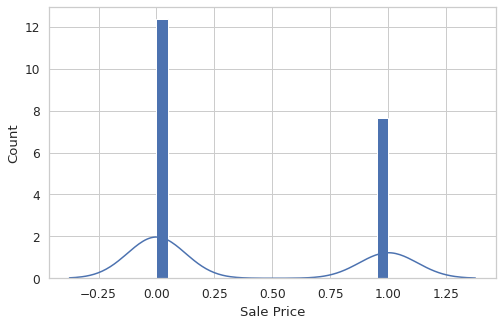

In [33]:
#Target Variable:-Survived
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train_data1['Survived'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

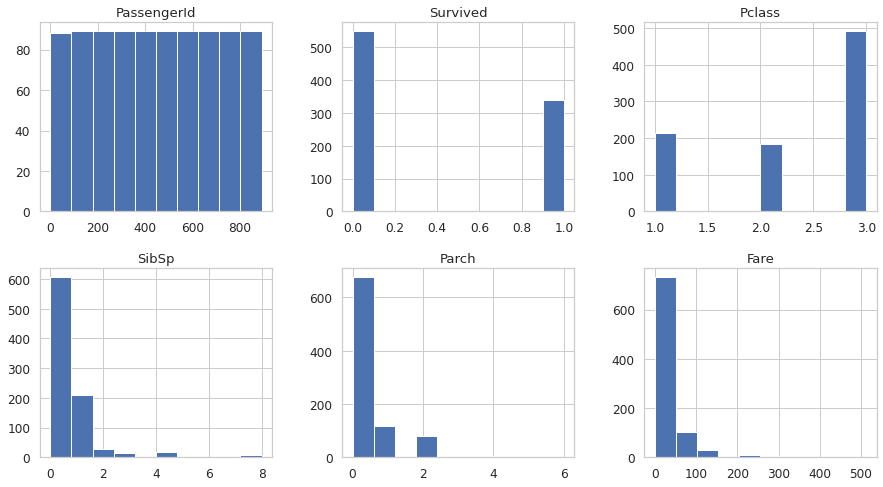

In [34]:
train_data1[numerical].hist(bins=10, figsize=(15, 8),layout=(2,3));

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


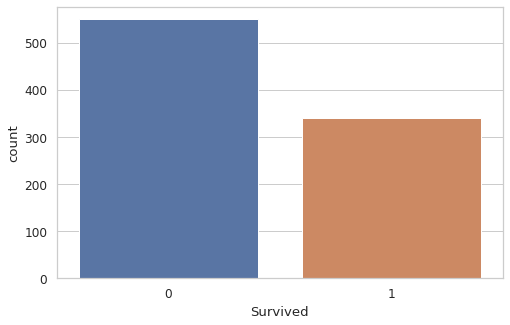

In [35]:
#Target Variable
sns.countplot(train_data1['Survived']);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


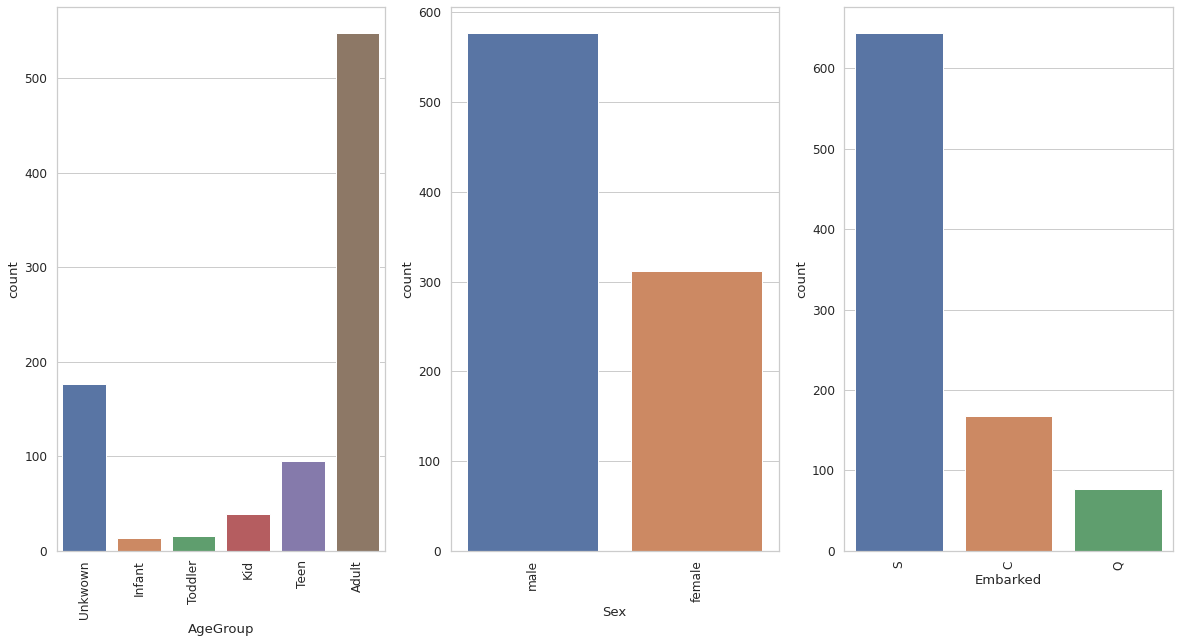

In [36]:
#Analyzing Categorical Variables
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(train_data1[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Multivariate Analysis

Multivariate analysis is categorized into these three conditions to address various combinations of numerical variables and categorical variables.

Analyzing Relationships Between Numerical Variables

Plotting relationships between variables allows us to easily get a visual understanding of patterns and correlations.

<AxesSubplot:>

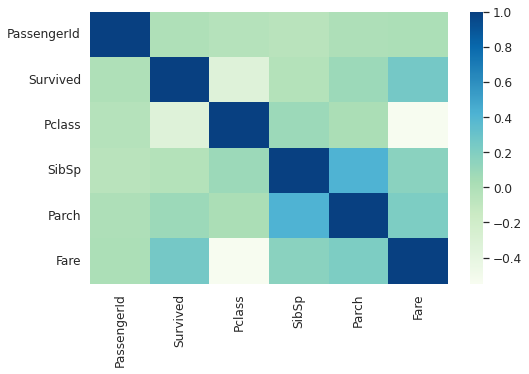

In [37]:
#Building correlation matrix
sns.heatmap(train_data1.corr(), cmap= "GnBu")

Since the correlation matrix only indicates the strength of linear relationship, it is better to plot the numerical variables using seaborn function sns.pairplot()

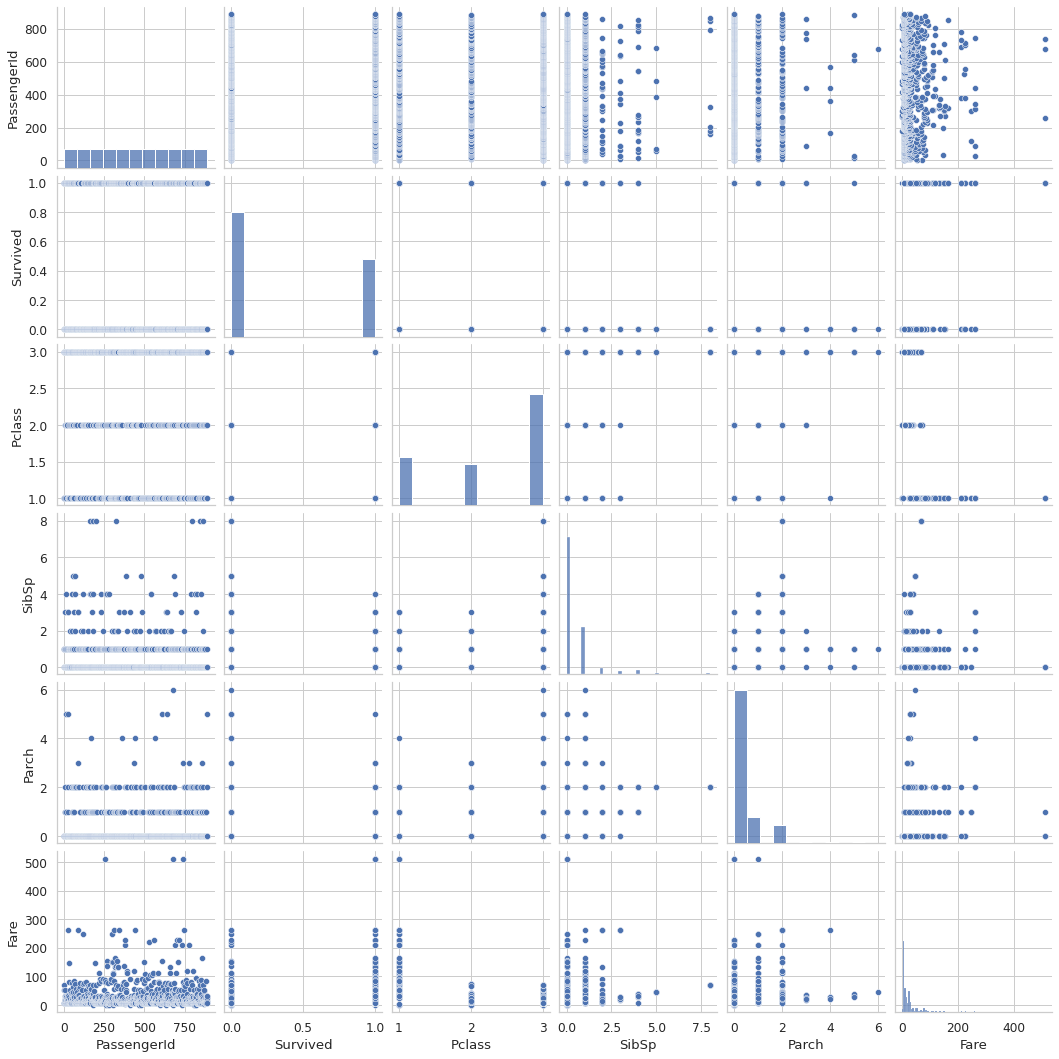

In [38]:
#pairplot
sns.pairplot(train_data1,height=2.5)

The scatter plot is often used for visualizing relationships between two numerical variables.

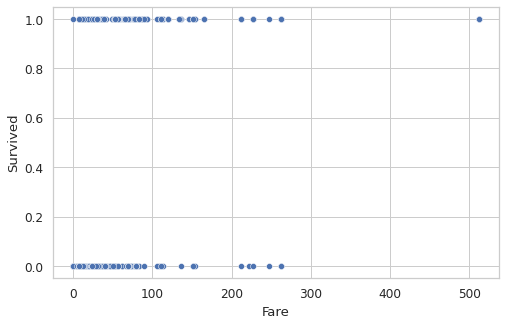

In [39]:
sns.scatterplot(x=train_data1['Fare'], y=train_data1['Survived']);

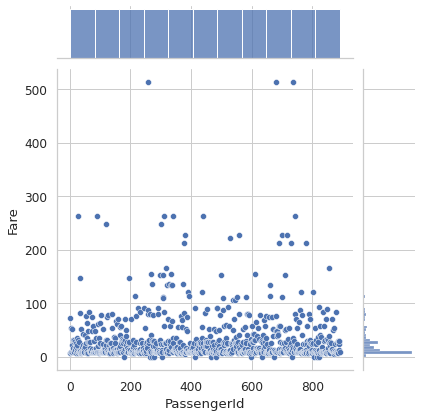

In [40]:
sns.jointplot(x=train_data1['PassengerId'], y=train_data1['Fare']);
#showing the relationship between two variables along with histograms of each variable in the margins

1. Categorical vs. Categorical 

In [41]:
train_data1[categorical]

,AgeGroup,Sex,Embarked
0,Adult,male,S
1,Adult,female,C
2,Adult,female,S
3,Adult,female,S
4,Adult,male,S
...,...,...,...
886,Adult,male,S
887,Teen,female,S
888,Unkwown,female,S
889,Adult,male,C


In [42]:
CrosstabResult=pd.crosstab(index=train_data1['Sex'],columns=train_data['Embarked'])
print(CrosstabResult)

Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441


<AxesSubplot:xlabel='Sex'>

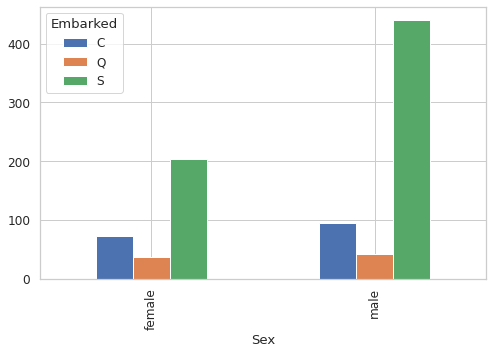

In [43]:
CrosstabResult.plot.bar()

In [44]:
CrosstabResult=pd.crosstab(index=train_data1['Sex'],columns=train_data1['AgeGroup'])
print(CrosstabResult)

AgeGroup  Unkwown  Infant  Toddler  Kid  Teen  Adult
Sex                                                 
female         53       4        8   20    43    184
male          124      10        8   19    52    364


<AxesSubplot:xlabel='Sex'>

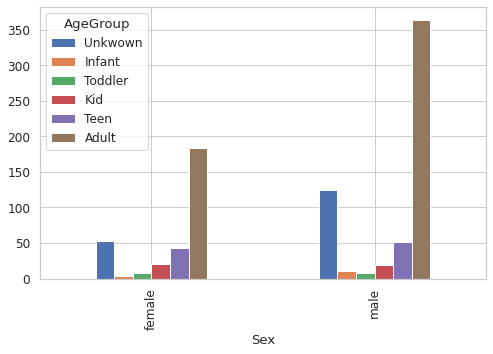

In [45]:
CrosstabResult.plot.bar()

In [46]:
CrosstabResult=pd.crosstab(index=train_data1['AgeGroup'],columns=train_data1['Embarked'])
print(CrosstabResult)

Embarked    C   Q    S
AgeGroup              
Unkwown    38  49   90
Infant      5   0    9
Toddler     1   1   14
Kid         5   3   31
Teen       18   6   71
Adult     101  18  429


<AxesSubplot:xlabel='AgeGroup'>

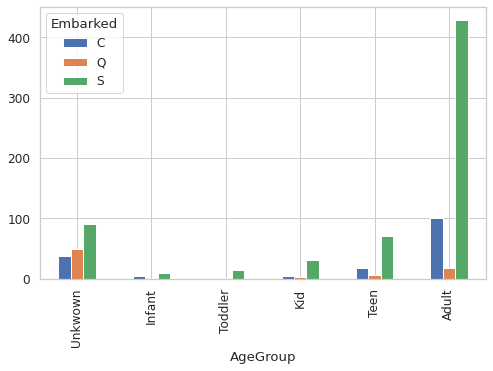

In [47]:
CrosstabResult.plot.bar()

In [48]:
CrosstabResult=pd.crosstab(train_data1['AgeGroup'],[train_data1['Embarked'],train_data1['Sex']])
print(CrosstabResult)

Embarked      C           Q           S     
Sex      female male female male female male
AgeGroup                                    
Unkwown      12   26     24   25     17   73
Infant        3    2      0    0      1    8
Toddler       1    0      0    1      7    7
Kid           3    2      0    3     17   14
Teen         14    4      5    1     24   47
Adult        40   61      7   11    137  292


<AxesSubplot:xlabel='AgeGroup'>

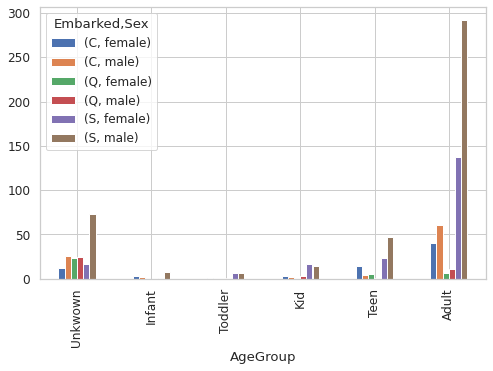

In [49]:
CrosstabResult.plot.bar()

Analyzing Relationships Between Numerical and Categorical Variables

The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables, and complex conditional plots are used to visualize conditional relationships.

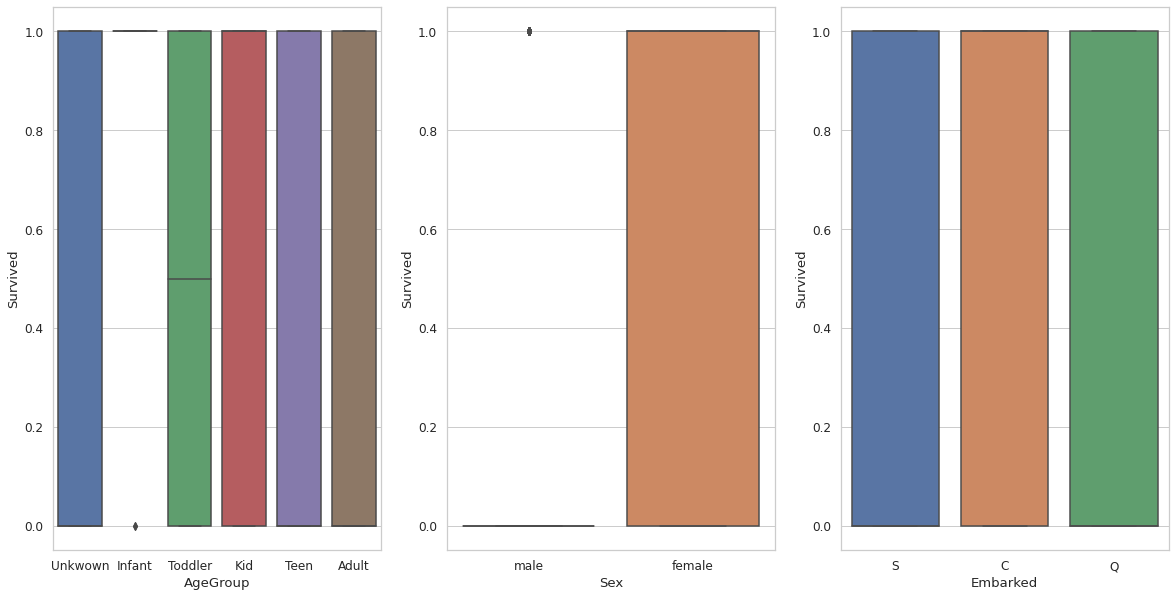

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Survived', data=train_data1, ax=subplot)

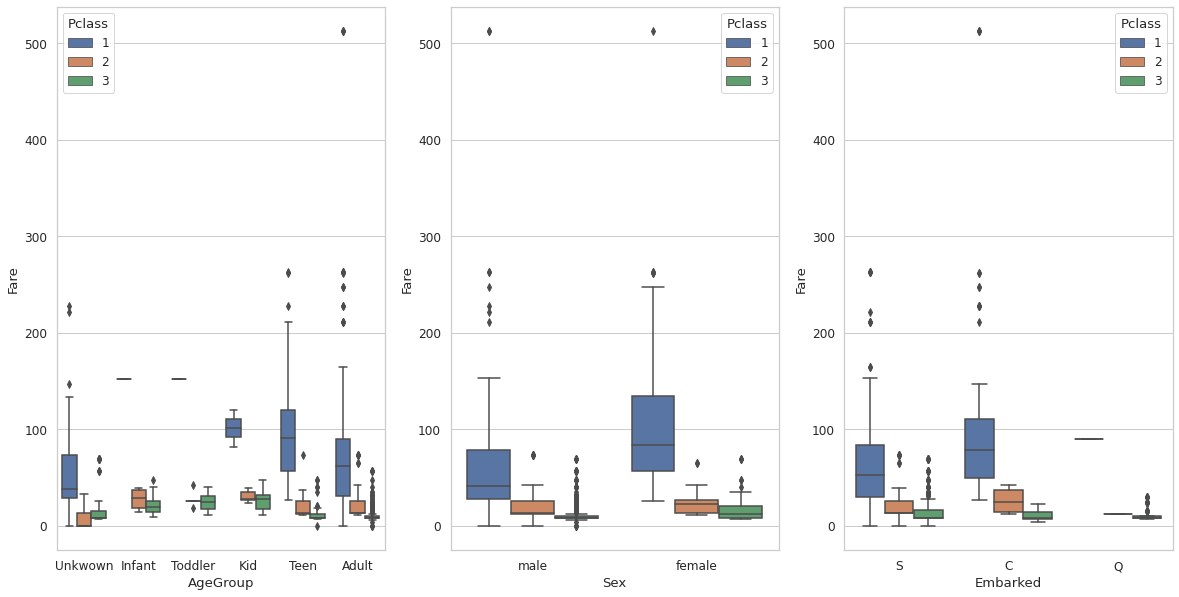

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Fare', data=train_data1, ax=subplot, hue='Pclass')
    

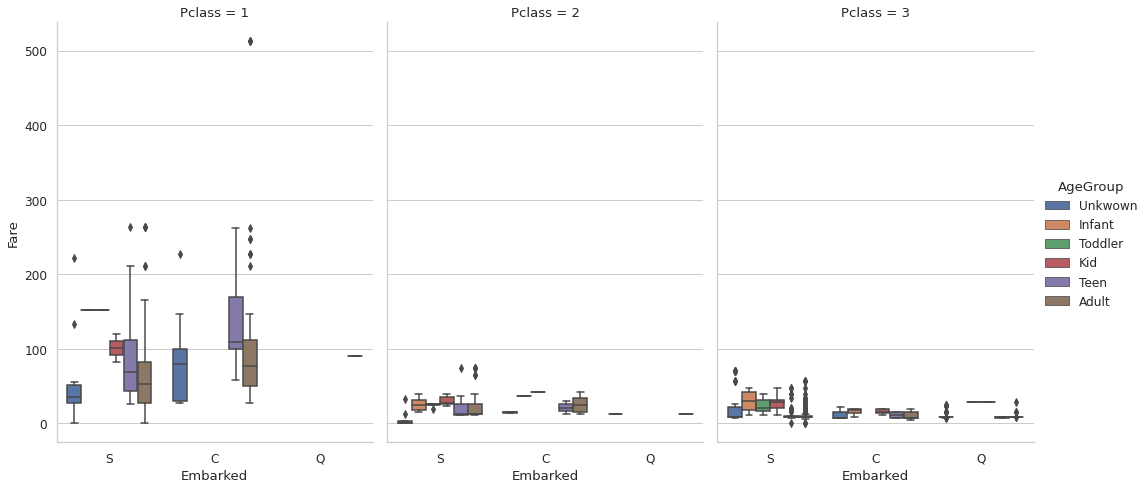

In [52]:
g = sns.catplot(x=var, y="Fare",
                hue="AgeGroup", col="Pclass",
                data=train_data1, kind="box",
                height=7, aspect=.7);

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

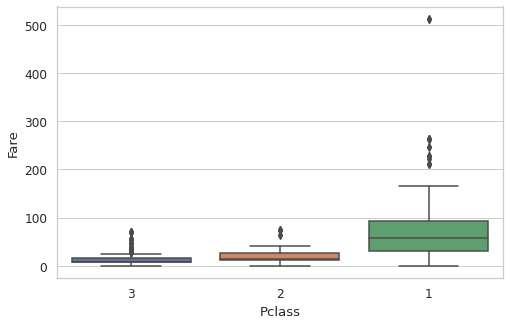

In [53]:
sorted_nb = train_data1.groupby(['Pclass'])['Fare'].median().sort_values()
sns.boxplot(x=train_data1['Pclass'], y=train_data1['Fare'], order=list(sorted_nb.index))

Categorical Feature Encoding

Logistic regression only accepts numeric values as the input, therefore, it is necessary to encode the categorical data into numbers. The most common techniques are one-hot encoding and label encoding

In [54]:
train_data1[categorical]

,AgeGroup,Sex,Embarked
0,Adult,male,S
1,Adult,female,C
2,Adult,female,S
3,Adult,female,S
4,Adult,male,S
...,...,...,...
886,Adult,male,S
887,Teen,female,S
888,Unkwown,female,S
889,Adult,male,C


In [55]:
train_data1.tail()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,AgeGroup,Sex,Embarked
886,887,0,2,0,0,13.00,Adult,male,S
887,888,1,1,0,0,30.00,Teen,female,S
888,889,0,3,1,2,23.45,Unkwown,female,S
889,890,1,1,0,0,30.00,Adult,male,C
890,891,0,3,0,0,7.75,Adult,male,Q


In [56]:
train_data1.shape

(889, 9)

In [57]:
len(train_data1.index)

889

In [58]:
train_data1['Embarked'].size

889

In [59]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
#categorical columns

# Encode labels in column 'Embarked'. 
train_data1['Embarked']= label_encoder.fit_transform(train_data1['Embarked'])
# Encode labels in column 'AgeGroup'. 
train_data1['AgeGroup']= label_encoder.fit_transform(train_data1['AgeGroup']) 
# Encode labels in column 'Sex'. 
train_data1['Sex']= label_encoder.fit_transform(train_data1['Sex']) 
train_data1.head()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,AgeGroup,Sex,Embarked
0,1,0,3,1,0,7.2500,0,1,2
1,2,1,1,1,0,71.2833,0,0,0
2,3,1,3,0,0,7.9250,0,0,2
3,4,1,1,1,0,53.1000,0,0,2
4,5,0,3,0,0,8.0500,0,1,2


In [60]:
train_data1.info()
#Now all variables are transformed into either integer or float.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Fare         889 non-null    float64
 6   AgeGroup     889 non-null    int64  
 7   Sex          889 non-null    int64  
 8   Embarked     889 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 101.7 KB


<AxesSubplot:>

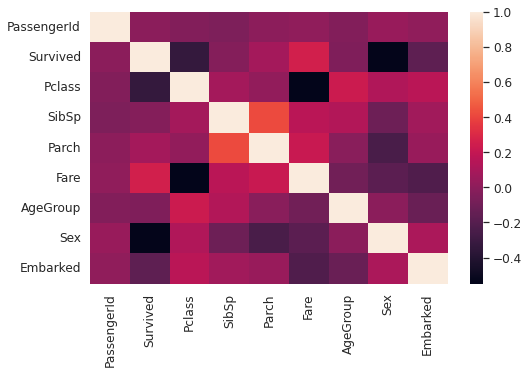

In [61]:
#Building correlation matrix
sns.heatmap(train_data1.corr())

In [62]:
#Since logistic regression requires there to be little multicollinearity among predictors, I tried to keep only one variable in each group of highly correlated variables.
td=train_data1[['Embarked','Sex','AgeGroup','Fare','SibSp','Pclass','PassengerId','Survived']]
td

,Embarked,Sex,AgeGroup,Fare,SibSp,Pclass,PassengerId,Survived
0,2,1,0,7.2500,1,3,1,0
1,0,0,0,71.2833,1,1,2,1
2,2,0,0,7.9250,0,3,3,1
3,2,0,0,53.1000,1,1,4,1
4,2,1,0,8.0500,0,3,5,0
...,...,...,...,...,...,...,...,...
886,2,1,0,13.0000,0,2,887,0
887,2,0,3,30.0000,0,1,888,1
888,2,0,5,23.4500,1,3,889,0
889,0,1,0,30.0000,0,1,890,1


In [63]:
# the input features (independent variables — X) and the label (dependent variable - y)
X=td.iloc[:,:-1]
y=td['Survived']

In [64]:
#Secondly, both features and labels are broken down into a subset for training and another for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(595, 7) (294, 7) (595,) (294,)


In [65]:
from sklearn.linear_model import LogisticRegression
reg= LogisticRegression(max_iter= 400)
reg.fit(X_train,y_train)
y_pred =reg.predict(X_test)

Model Evaluation

ROC, AUC, Confusion Matrix and Accuracy are widely used for evaluating Logistic Regression model. All of these metrics are based on calculating the difference between the y values predicted by the model and the actual y values of the test set, hence y_pred and y_test. There are four possible scenarios while comparing the differences:

True Positive: survived when predicted survived
    
True Negative: Didn't survive when predicted Didn't survive
    
False Positive: Didn;t survive when predicted survived
    
False Negative:Survived when predicted Didn't survive

Confusion Matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


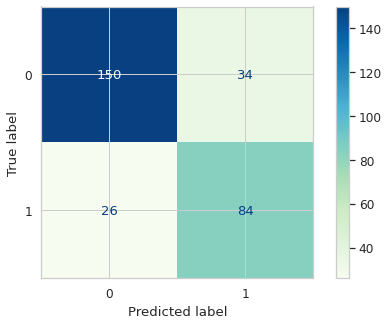

In [66]:
from sklearn import metrics
#confusion matrix
confusion_matrix=metrics.plot_confusion_matrix(reg,X_test,y_test, cmap="GnBu")
confusion_matrix

In [67]:
#Accuracy calculates the ratio of all correct predictions
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7959183673469388


In [68]:
fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
print("AUC:",round(metrics.auc(fpr,tpr),2)) 

AUC: 0.79


Improve the current model, by introducing hyperparameter tuning, feature importance, and standardization

Decision Tree Implementation

In [69]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion = "entropy")

In [70]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [71]:
d_pred=model.predict(X_test)

In [72]:
d_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0])

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test,d_pred))

Accuracy: 0.7244897959183674


In [74]:
fpr, tpr, _thresholds = metrics.roc_curve(y_test,d_pred)
print("AUC:",round(metrics.auc(fpr,tpr),2)) 

AUC: 0.71


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


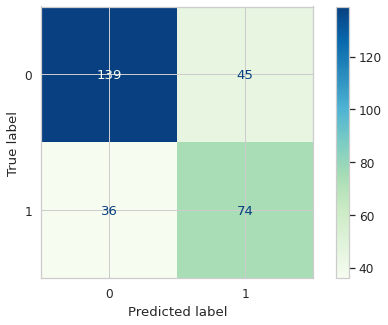

In [75]:
from sklearn import metrics
#confusion matrix
confusion_matrix=metrics.plot_confusion_matrix(model,X_test,y_test, cmap="GnBu")
confusion_matrix

 Random Forest Algorithm

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
r_pred = rfc.predict(X_test)

In [77]:
r_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0])

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test,r_pred))

Accuracy: 0.7755102040816326


In [79]:
fpr, tpr, _thresholds = metrics.roc_curve(y_test,r_pred)
print("AUC:",round(metrics.auc(fpr,tpr),2)) 

AUC: 0.75


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


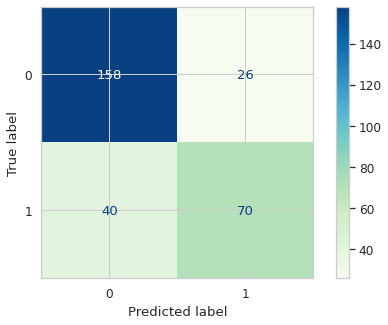

In [80]:
from sklearn import metrics
#confusion matrix
confusion_matrix=metrics.plot_confusion_matrix(rfc,X_test,y_test, cmap="GnBu")
confusion_matrix

Support Vector Machine (SVM)

In [81]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)

In [82]:
svm_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test,svm_pred))

Accuracy: 0.6428571428571429


In [84]:
fpr, tpr, _thresholds = metrics.roc_curve(y_test,svm_pred)
print("AUC:",round(metrics.auc(fpr,tpr),2)) 

AUC: 0.53


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


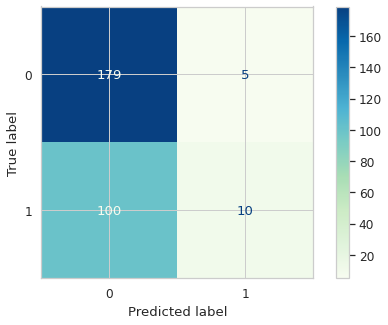

In [85]:
from sklearn import metrics
#confusion matrix
confusion_matrix=metrics.plot_confusion_matrix(svc,X_test,y_test, cmap="GnBu")
confusion_matrix

K-Nearest Neighbour (KNN)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [87]:
knn_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0])

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test,knn_pred))

Accuracy: 0.5884353741496599


In [89]:
fpr, tpr, _thresholds = metrics.roc_curve(y_test,knn_pred)
print("AUC:",round(metrics.auc(fpr,tpr),2)) 

AUC: 0.53


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


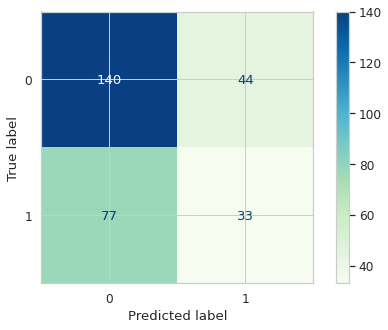

In [90]:
from sklearn import metrics
#confusion matrix
confusion_matrix=metrics.plot_confusion_matrix(knn,X_test,y_test, cmap="GnBu")
confusion_matrix

 Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
nb_pred = gnb.predict(X_test)

In [92]:
nb_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1])

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test,nb_pred))

Accuracy: 0.782312925170068


In [94]:
fpr, tpr, _thresholds = metrics.roc_curve(y_test,nb_pred)
print("AUC:",round(metrics.auc(fpr,tpr),2)) 

AUC: 0.78


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


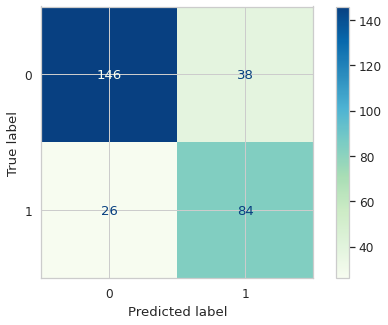

In [95]:
from sklearn import metrics
#confusion matrix
confusion_matrix=metrics.plot_confusion_matrix(gnb,X_test,y_test, cmap="GnBu")
confusion_matrix

In [96]:
auc_list=[0.79,0.53,0.53,0.72,0.76,0.78,]
acc_list=[0.7959183673469388,0.6428571428571429,0.5884353741496599,0.7346938775510204,0.7857142857142857,0.782312925170068,]
model_list=["Logistic Regression","SVM","KNN","Decision Tree","Random Forest","Naives Bayes"]
acc_list=[round(num,2) for num in acc_list]

In [97]:
#Accuracy and AUC
result_df=pd.DataFrame({"Model":model_list, "Accuracy":acc_list, "AUC":auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.80,0.79
1,SVM,0.64,0.53
2,KNN,0.59,0.53
3,Decision Tree,0.73,0.72
4,Random Forest,0.79,0.76
5,Naives Bayes,0.78,0.78


In [98]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [99]:
test_data.shape

(418, 11)

In [100]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [101]:

#replace Null values in "Age:-Column"
test_data["Age"].fillna(-1, inplace = True)
test_data.Age.dtype

test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-1.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,-1.0,0,0,359309,8.0500,NaN,S


In [102]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [103]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [104]:
#replace Null values in "Cabin:-Column"
test_data["Cabin"].fillna("Cabinless", inplace = True)
test_data.dropna(inplace=True)

In [105]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [106]:
test_data.shape

(418, 11)

In [107]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [108]:
test_data.drop(["Name"],axis=1,inplace = True)

In [109]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [110]:
test_data
bins= [-1,0,2,4,13,20,110]
labels = ['Unkwown','Infant','Toddler','Kid','Teen','Adult']
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,male,34.5,0,0,330911,7.8292,Cabinless,Q,Adult
1,893,3,female,47.0,1,0,363272,7.0000,Cabinless,S,Adult
2,894,2,male,62.0,0,0,240276,9.6875,Cabinless,Q,Adult
3,895,3,male,27.0,0,0,315154,8.6625,Cabinless,S,Adult
4,896,3,female,22.0,1,1,3101298,12.2875,Cabinless,S,Adult


In [111]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
#categorical columns

# Encode labels in column 'Embarked'. 
test_data['Embarked']= label_encoder.fit_transform(test_data['Embarked'])
# Encode labels in column 'AgeGroup'. 
test_data['AgeGroup']= label_encoder.fit_transform(test_data['AgeGroup']) 
# Encode labels in column 'Sex'. 
test_data['Sex']= label_encoder.fit_transform(test_data['Sex']) 
test_data['Cabin']= label_encoder.fit_transform(test_data['Cabin'])
test_data.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,1,34.5,0,0,330911,7.8292,47,1,0
1,893,3,0,47.0,1,0,363272,7.0000,47,2,0
2,894,2,1,62.0,0,0,240276,9.6875,47,1,0
3,895,3,1,27.0,0,0,315154,8.6625,47,2,0
4,896,3,0,22.0,1,1,3101298,12.2875,47,2,0


In [112]:
test_data.drop(["Cabin"],axis=1,inplace = True)

In [113]:
test_data.drop(["Ticket"],axis=1,inplace = True)

In [114]:
test_data.drop(["Age"],axis=1,inplace = True)

In [115]:
test_data.drop(["Parch"],axis=1,inplace = True)

In [116]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked',
       'AgeGroup'],
      dtype='object')

In [117]:
#Since logistic regression requires there to be little multicollinearity among predictors, I tried to keep only one variable in each group of highly correlated variables.
test_data1=test_data[['Embarked','Sex','AgeGroup','Fare','SibSp','Pclass','PassengerId']]
test_data1

,Embarked,Sex,AgeGroup,Fare,SibSp,Pclass,PassengerId
0,1,1,0,7.8292,0,3,892
1,2,0,0,7.0000,1,3,893
2,1,1,0,9.6875,0,2,894
3,2,1,0,8.6625,0,3,895
4,2,0,0,12.2875,1,3,896
...,...,...,...,...,...,...,...
413,2,1,5,8.0500,0,3,1305
414,0,0,0,108.9000,0,1,1306
415,2,1,0,7.2500,0,3,1307
416,2,1,5,8.0500,0,3,1308


In [118]:
survived_pred =reg.predict(test_data1)

In [119]:
victor_submission = pd.DataFrame({
        "PassengerId": test_data1["PassengerId"],
        "Survived": survived_pred
    })
victor_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [120]:
victor_submission.to_csv('victor_submission2.csv', index=False)
victor_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
